In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

2023-12-06 11:38:42.670508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Load your CSV file
csv_file_path = 'output.csv'  # Change this to your actual file name
df = pd.read_csv(csv_file_path, header=0, dtype=int)

# Extract labels and pixel values
labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values.reshape(-1, 128, 128, 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
print("x_train items: ", len(X_train))
print("x_test items: ",len(X_test))

x_train items:  9088
x_test items:  2272


In [10]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(14, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [11]:
# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/30
228/228 [==============================] - 53s 231ms/step - loss: 1.7814 - accuracy: 0.3787 - val_loss: 2.3483 - val_accuracy: 0.2261
Epoch 2/30
228/228 [==============================] - 51s 225ms/step - loss: 1.4496 - accuracy: 0.4930 - val_loss: 2.5173 - val_accuracy: 0.2195
Epoch 3/30
228/228 [==============================] - 52s 227ms/step - loss: 1.0167 - accuracy: 0.6565 - val_loss: 3.1267 - val_accuracy: 0.2442
Epoch 4/30
228/228 [==============================] - 53s 230ms/step - loss: 0.6562 - accuracy: 0.7935 - val_loss: 3.7042 - val_accuracy: 0.2486
Epoch 5/30
228/228 [==============================] - 54s 235ms/step - loss: 0.4072 - accuracy: 0.8872 - val_loss: 4.7272 - val_accuracy: 0.2585
Epoch 6/30
228/228 [==============================] - 52s 228ms/step - loss: 0.2852 - accuracy: 0.9326 - val_loss: 5.1543 - val_accuracy: 0.2712


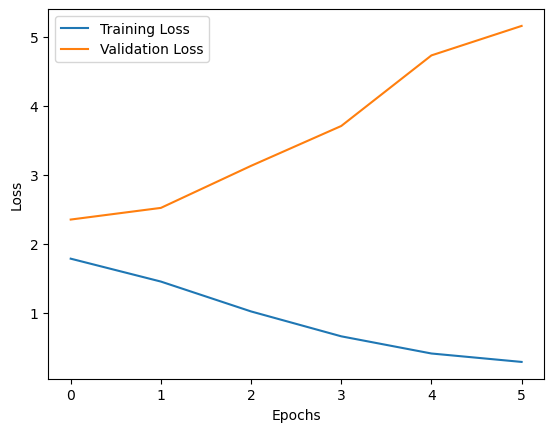

In [14]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

71/71 [==============================] - 5s 66ms/step - loss: 2.3796 - accuracy: 0.2051
Test Loss: 2.3796
Test Accuracy: 0.2051
